In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import datetime as dt
import base64
import warnings
warnings.simplefilter('ignore')

<h2>データの整形</h2>

In [30]:
dt_now=dt.datetime.now()
file_day=dt_now.strftime("%Y-%m-%d")
print(file_day)
columns=["day","time","IP","myip","status","status_code",'true or flase','user_agent']

'''
#本番用df

#テスト用df
'''
# df = pandas.read_csv('2022-01-26.log',delimiter=' ' ,names=columns)
df = pandas.read_csv('../../../../home/ubuntu/wowHoneypot-bunseki/input/log/'+str(file_day)+'.log',delimiter=' ',names=columns)
for i in range(len(df)):
    df['user_agent'][i]=base64.b64decode(df['user_agent'][i].encode())
df=df[['day','time','IP','status','status_code','user_agent']]

2022-01-26


In [31]:
for i in range(len(df)):
    df['day'][i]=str(df['day'][i]).replace('[2', '2')
    df['time'][i]=str(df['time'][i]).replace('0900]', '0900')
df

,day,time,IP,status,status_code,user_agent
0,2022-01-19,20:04:33+0900,153.134.239.179,GET / HTTP/1.1,200,b'GET / HTTP/1.1\nHost: 52.192.4.215\nUpgrade-...
1,2022-01-19,20:04:36+0900,153.134.239.179,GET / HTTP/1.1,200,b'GET / HTTP/1.1\nHost: 52.192.4.215\nUpgrade-...
2,2022-01-19,20:04:38+0900,153.134.239.179,GET / HTTP/1.1,200,b'GET / HTTP/1.1\nHost: 52.192.4.215\nUpgrade-...
3,2022-01-19,20:04:44+0900,153.134.239.179,GET / HTTP/1.1,200,b'GET / HTTP/1.1\nHost: 52.192.4.215\nUpgrade-...
4,2022-01-19,21:30:06+0900,85.108.240.214,GET / HTTP/1.0,200,b'GET / HTTP/1.0\nHost: 52.192.4.215\nAccept: ...
...,...,...,...,...,...,...
1290,2022-01-26,14:56:42+0900,95.221.182.113,GET /api/markets HTTP/1.1,200,b'GET /api/markets HTTP/1.1\nUser-Agent: curl/...
1291,2022-01-26,15:06:05+0900,135.125.246.189,POST / HTTP/1.1,200,b'POST / HTTP/1.1\nHost: 52.192.4.215\nContent...
1292,2022-01-26,15:06:06+0900,135.125.246.189,GET /.env HTTP/1.1,200,b'GET /.env HTTP/1.1\nHost: 52.192.4.215\nConn...
1293,2022-01-26,15:21:06+0900,174.138.40.190,GET /.env HTTP/1.1,200,b'GET /.env HTTP/1.1\nHost: 52.192.4.215\nConn...


<h2>全体データ(上位5件)</h2>

In [32]:
file_day=dt_now - dt.timedelta(days=1)
file_day=file_day.strftime("%Y-%m-%d")
to_day=df[df['day']==str(file_day)]
#%H:%M:%S+%Z
to_day['time']=pandas.to_datetime(to_day['time'], format='%H:%M:%S%z')
to_day=to_day.reset_index()
to_day=to_day[['day','time','IP','status','status_code','user_agent']]

In [33]:
to_day.head()

,day,time,IP,status,status_code,user_agent
0,2022-01-25,1900-01-01 00:10:33+09:00,178.32.197.87,GET / HTTP/1.1,200,b'GET / HTTP/1.1\nHost: 52.192.4.215\nConnecti...
1,2022-01-25,1900-01-01 01:16:21+09:00,206.189.226.29,GET /.env HTTP/1.1,200,b'GET /.env HTTP/1.1\nHost: 52.192.4.215\nConn...
2,2022-01-25,1900-01-01 01:16:21+09:00,206.189.226.29,POST / HTTP/1.1,200,b'POST / HTTP/1.1\nHost: 52.192.4.215\nConnect...
3,2022-01-25,1900-01-01 01:26:24+09:00,195.154.63.222,GET /favicon.ico HTTP/1.1,200,b'GET /favicon.ico HTTP/1.1\nHost: 52.192.4.21...
4,2022-01-25,1900-01-01 01:48:33+09:00,135.125.246.110,POST / HTTP/1.1,200,b'POST / HTTP/1.1\nHost: 52.192.4.215\nContent...


<h3>ステータスコード</h3>

In [38]:
to_day.groupby('status_code').count().sort_values('IP', ascending=False)['day']

status_code
200    114
Name: day, dtype: int64

<h2>当日のアクセスが多いディレクトリ</h2>

In [37]:
to_day.groupby('status').count().sort_values('status_code', ascending=False)['day']

status
GET /.env HTTP/1.1                                                    32
POST / HTTP/1.1                                                       30
GET / HTTP/1.1                                                        20
GET / HTTP/1.0                                                         7
GET /favicon.ico HTTP/1.1                                              2
POST /autodiscover HTTP/1.1                                            2
POST /.env HTTP/1.1                                                    2
GET /_ignition/execute-solution HTTP/1.1                               2
POST /sdk HTTP/1.1                                                     1
POST /images.php HTTP/1.1                                              1
POST /cgi-bin/.%2e/.%2e/.%2e/.%2e/bin/sh HTTP/1.1                      1
POST /Autodiscover/Autodiscover.xml HTTP/1.1                           1
GET /vendor/phpunit/phpunit/src/Util/PHP/eval-stdin.php HTTP/1.1       1
GET /nmaplowercheck1643053826 HTTP/1.1      

<h2>アクセスの多いIP</h2>

In [34]:
ip=to_day.groupby('IP').count().sort_values('status_code', ascending=False)['day'][0:10]
ip

IP
135.125.246.189    26
103.230.15.57      10
45.146.165.37       8
135.125.246.110     6
44.234.51.40        4
44.202.23.255       4
13.68.241.141       3
3.133.12.155        2
206.189.226.29      2
206.189.226.63      2
Name: day, dtype: int64

<h2>ファイル全体アクセスログ可視化(5分間合計)</h2>

<AxesSubplot:xlabel='time'>

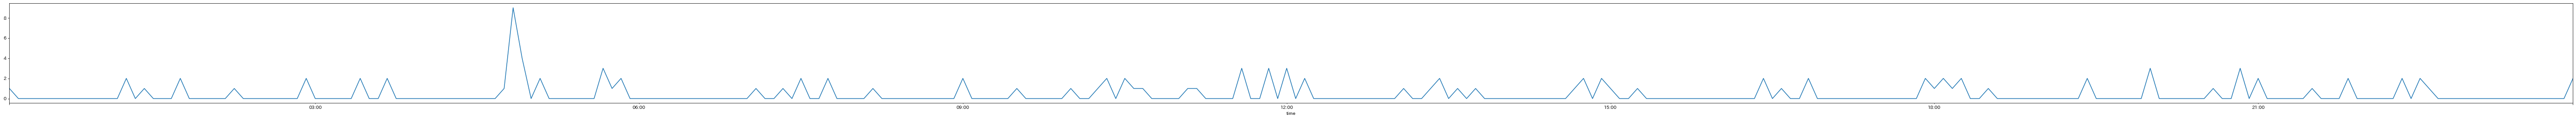

In [36]:
to_day.groupby(pandas.Grouper(key='time', freq='05T')).count()['day'].plot(figsize=(100,4))

<h2>攻撃者の情報</h2>

In [35]:
print(len(ip))
for i in range(len(ip)):
    ip_list=to_day.groupby('IP').count().sort_values('status_code', ascending=False)['day'][0:10][i]
    print('https://www.abuseipdb.com/check/'+str(ip.index[i]))

10
https://www.abuseipdb.com/check/135.125.246.189
https://www.abuseipdb.com/check/103.230.15.57
https://www.abuseipdb.com/check/45.146.165.37
https://www.abuseipdb.com/check/135.125.246.110
https://www.abuseipdb.com/check/44.234.51.40
https://www.abuseipdb.com/check/44.202.23.255
https://www.abuseipdb.com/check/13.68.241.141
https://www.abuseipdb.com/check/3.133.12.155
https://www.abuseipdb.com/check/206.189.226.29
https://www.abuseipdb.com/check/206.189.226.63
